## MCP9808 Temperature Sensor  
The MCP9808 is a digitial temperature sensor with an accuracy of +/-0.25 C, a working range of -40 to 125 C and a precision of +0.0625 C.  

Manufacturer Link: https://www.microchip.com/wwwproducts/en/en556182

Breakout Board Used: https://www.adafruit.com/product/1782

In [1]:
import matplotlib.pyplot as plt

from meerkat import mcp9808, parser

Select I2C bus and instance device class.  Note I2C bus is 1 on Raspberry Pi.

In [2]:
dev = mcp9808.MCP9808(bus_n=1)

#### Configuration

In [3]:
dev.print_status()

Configuration Register: None
Upper Temperature: None
Lower Temperature: None
Critical Temperature: None
Manufacturer: 84
Device ID: 4
Device Revision: 0


#### Measurement

In [4]:
dev.get_temp()

20.625

In [5]:
# get method, list with description and sample number
dev.get(description='test_1', n=5)

[['test_1', 1, 20.5625],
 ['test_1', 2, 20.5625],
 ['test_1', 3, 20.5625],
 ['test_1', 4, 20.5625],
 ['test_1', 5, 20.5625]]

#### JSON Data Publishing  

In [6]:
# lower metadata interval from a default of once every 10 samples
dev.json_writer.metadata_interval = 3

In [7]:
# writing method with description and sample number
dev.publish(description='test_2', n=5)

['{"description": "test_2", "sample_n": 0, "temperature": 20.5625, "std_time_ms": "2020-01-11 10:24:43.040307"}',
 '{"description": "test_2", "sample_n": 1, "temperature": 20.5625, "std_time_ms": "2020-01-11 10:24:43.041406"}',
 '{"description": null, "sample_n": 2, "temperature": 20.5625, "std_time_ms": "2020-01-11 10:24:43.042440", "name": "MCP9808", "title": null, "format": null, "encoding": "utf-8", "bytes": null, "hash": null, "schema": null, "sources": null, "licenses": null, "line_terminator": "\\n", "quote_char": "\\"", "double_quote": true, "escape_char": "\\\\", "null_sequence": "NA", "comment": "#", "skip_lines": 0, "path": null, "device": {"name": "MCP9808", "version_hw": "0.1", "version_sw": "0.1", "accuracy": "+/-0.25 (typical) C", "precision": "0.0625 C maximum", "bus": "<meerkat.i2c_pi.WrapI2C object at 0xacfc6570>", "state": null, "active": null, "error": null, "dtype": null, "description": "+/-0.5 degrees Celcius maximum accuracy digital temperature sensor", "urls": "

#### JSON Writer Output  

In [8]:
# default writer format is CSV, switch to JSON
dev.writer_output = 'json'

In [9]:
# writer method with description and sample number
dev.write(description='test_3', n=30)

In [10]:
dev.json_writer.path

'2020_01_11_10_24_43.jsontxt'

In [11]:
with open(dev.json_writer.path, 'r') as f:
    for _ in range(4):
        print(f.readline().strip())

{"description": "test_3", "sample_n": 0, "temperature": 20.5625, "std_time_ms": "2020-01-11 10:24:43.129481"}
{"description": "test_3", "sample_n": 1, "temperature": 20.5625, "std_time_ms": "2020-01-11 10:24:43.131919"}
{"description": null, "sample_n": 2, "temperature": 20.5625, "std_time_ms": "2020-01-11 10:24:43.133119", "name": "MCP9808", "title": null, "format": null, "encoding": "utf-8", "bytes": null, "hash": null, "schema": null, "sources": null, "licenses": null, "line_terminator": "\n", "quote_char": "\"", "double_quote": true, "escape_char": "\\", "null_sequence": "NA", "comment": "#", "skip_lines": 0, "path": "2020_01_11_10_24_43.jsontxt", "device": {"name": "MCP9808", "version_hw": "0.1", "version_sw": "0.1", "accuracy": "+/-0.25 (typical) C", "precision": "0.0625 C maximum", "bus": "<meerkat.i2c_pi.WrapI2C object at 0xacfc6570>", "state": null, "active": null, "error": null, "dtype": null, "description": "+/-0.5 degrees Celcius maximum accuracy digital temperature sensor"

#### CSV Writer Output

In [12]:
# switch back to CSV format
dev.writer_output = 'csv'

In [13]:
# writer method with description and sample number
dev.write(description='test_4', n=30)

In [14]:
dev.csv_writer.path

'2020_01_11_10_24_43_data.csv'

In [15]:
# load .csv data written with dev.write
m, df = parser.csv_resource(dev.csv_writer.path)

#### Metadata in the CSV

In [16]:
m

{'name': 'MCP9808',
 'title': None,
 'description': None,
 'format': None,
 'encoding': 'utf-8',
 'bytes': None,
 'hash': None,
 'schema': None,
 'sources': None,
 'licenses': None,
 'line_terminator': '\n',
 'quote_char': '"',
 'double_quote': True,
 'escape_char': '\\',
 'null_sequence': 'NA',
 'comment': '#',
 'skip_lines': 1,
 'path': '2020_01_11_10_24_43_data.csv',
 'device': {'name': 'MCP9808',
  'version_hw': '0.1',
  'version_sw': '0.1',
  'accuracy': '+/-0.25 (typical) C',
  'precision': '0.0625 C maximum',
  'bus': '<meerkat.i2c_pi.WrapI2C object at 0xacfc6570>',
  'state': None,
  'active': None,
  'error': None,
  'dtype': None,
  'description': '+/-0.5 degrees Celcius maximum accuracy digital temperature sensor',
  'urls': 'https://www.microchip.com/datasheet/MCP9808',
  'manufacturer': 'Microchip',
  'units': 'Degrees Celcius',
  'calibration_date': None},
 'units': None,
 'dtypes': None,
 'accuracy': None,
 'precision': None,
 'time_format': 'std_time_ms',
 'strfmtime': 

#### Parsed CSV data

In [17]:
df.head()

,std_time_ms,description,sample_n,temperature,datetime64_ns
0,2020-01-11 10:24:43.327626,test_4,0,20.5625,2020-01-11 10:24:43.327626
1,2020-01-11 10:24:43.329694,test_4,1,20.5625,2020-01-11 10:24:43.329694
2,2020-01-11 10:24:43.331863,test_4,2,20.5625,2020-01-11 10:24:43.331863
3,2020-01-11 10:24:43.346896,test_4,3,20.5625,2020-01-11 10:24:43.346896
4,2020-01-11 10:24:43.349377,test_4,4,20.5625,2020-01-11 10:24:43.349377


In [18]:
# Pandas 0.24.1 hack
df.datetime64_ns = df.datetime64_ns.dt.tz_localize('UTC')

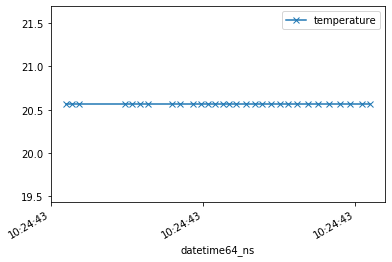

In [19]:
df[["datetime64_ns", 
    "temperature"]].plot(x="datetime64_ns", style='-x');

In [20]:
dt = df.datetime64_ns[len(df)-1]-df.datetime64_ns[0]
dtt = dt.seconds + dt.microseconds / 10**6
print('Sample Rate: {:.4f} Hz'.format(len(df)/dtt))

Sample Rate: 300.4266 Hz
